# Symptom Based Disease Detection

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df = pd.read_csv('./dataset/disease questionaires.csv')

In [132]:
df.head()

,Leaf Color,Leaf Spots,Leaf Wilting,Leaf Curling,Stunted Growth,Stem Color,Root Rot,Abnormal Fruiting,Presence of Pests,Disease/Deficiency
0,Yellow,Brown,Yes,No,Slow Growth,Brown,Yes,Normal,Aphids,Banana Bunchy Top
1,Brown,Black,No,Yes,Slow Growth,Black,No,Normal,None,Fusarium Wilt
2,Pale Green,None,No,No,Normal,Yellow,No,Normal,None,Nutrient Deficiency
3,Brown,Brown,No,Yes,Slow Growth,Red,No,Distorted,Caterpillars,Black Sigatoka
4,Yellow,None,Yes,No,Slow Growth,Green,No,Normal,None,Nitrogen Deficiency


In [133]:
print("Dataset Dimensions: ", df.shape)

Dataset Dimensions:  (135, 10)


In [134]:
print("\nColumn Names and Data Types:\n")
print(df.dtypes)


Column Names and Data Types:

Leaf Color            object
Leaf Spots            object
Leaf Wilting          object
Leaf Curling          object
Stunted Growth        object
Stem Color            object
Root Rot              object
Abnormal Fruiting     object
Presence of Pests     object
Disease/Deficiency    object
dtype: object


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Leaf Color          135 non-null    object
 1   Leaf Spots          135 non-null    object
 2   Leaf Wilting        135 non-null    object
 3   Leaf Curling        135 non-null    object
 4   Stunted Growth      135 non-null    object
 5   Stem Color          135 non-null    object
 6   Root Rot            135 non-null    object
 7   Abnormal Fruiting   135 non-null    object
 8   Presence of Pests   135 non-null    object
 9   Disease/Deficiency  135 non-null    object
dtypes: object(10)
memory usage: 10.7+ KB


In [136]:
df.describe()

,Leaf Color,Leaf Spots,Leaf Wilting,Leaf Curling,Stunted Growth,Stem Color,Root Rot,Abnormal Fruiting,Presence of Pests,Disease/Deficiency
count,135,135,135,135,135,135,135,135,135,135
unique,5,4,3,3,3,6,3,3,5,16
top,Brown,None,No,No,Slow Growth,Yellow,No,Normal,None,Iron Deficiency
freq,56,64,96,88,72,40,96,96,80,16


In [137]:
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

Leaf Color            0
Leaf Spots            0
Leaf Wilting          0
Leaf Curling          0
Stunted Growth        0
Stem Color            0
Root Rot              0
Abnormal Fruiting     0
Presence of Pests     0
Disease/Deficiency    0
dtype: int64


### EDA

In [138]:
df.head()

,Leaf Color,Leaf Spots,Leaf Wilting,Leaf Curling,Stunted Growth,Stem Color,Root Rot,Abnormal Fruiting,Presence of Pests,Disease/Deficiency
0,Yellow,Brown,Yes,No,Slow Growth,Brown,Yes,Normal,Aphids,Banana Bunchy Top
1,Brown,Black,No,Yes,Slow Growth,Black,No,Normal,None,Fusarium Wilt
2,Pale Green,None,No,No,Normal,Yellow,No,Normal,None,Nutrient Deficiency
3,Brown,Brown,No,Yes,Slow Growth,Red,No,Distorted,Caterpillars,Black Sigatoka
4,Yellow,None,Yes,No,Slow Growth,Green,No,Normal,None,Nitrogen Deficiency


In [139]:
# Calculate the frequency or distribution of categorical variables
print("\nValue Counts for Categorical Columns:\n")
categorical_cols = ['Leaf Color', 'Leaf Spots', 'Leaf Wilting', 'Leaf Curling', 'Stunted Growth', 'Stem Color', 'Root Rot', 'Abnormal Fruiting', 'Presence of Pests', 'Disease/Deficiency']
for col in categorical_cols:
    print(df[col].value_counts())


Value Counts for Categorical Columns:

Brown         56
Yellow        32
Pale Green    32
Dark Green     8
Leaf Color     7
Name: Leaf Color, dtype: int64
None          64
Brown         40
Black         24
Leaf Spots     7
Name: Leaf Spots, dtype: int64
No              96
Yes             32
Leaf Wilting     7
Name: Leaf Wilting, dtype: int64
No              88
Yes             40
Leaf Curling     7
Name: Leaf Curling, dtype: int64
Slow Growth       72
Normal            56
Stunted Growth     7
Name: Stunted Growth, dtype: int64
Yellow        40
Brown         24
Red           24
Green         24
Black         16
Stem Color     7
Name: Stem Color, dtype: int64
No          96
Yes         32
Root Rot     7
Name: Root Rot, dtype: int64
Normal               96
Distorted            32
Abnormal Fruiting     7
Name: Abnormal Fruiting, dtype: int64
None                 80
Aphids               32
Mites                 8
Caterpillars          8
Presence of Pests     7
Name: Presence of Pests, dtype

In [140]:
df.columns

Index(['Leaf Color', 'Leaf Spots', 'Leaf Wilting', 'Leaf Curling',
       'Stunted Growth', 'Stem Color', 'Root Rot', 'Abnormal Fruiting',
       'Presence of Pests', 'Disease/Deficiency'],
      dtype='object')

#### Visualizing Each Column

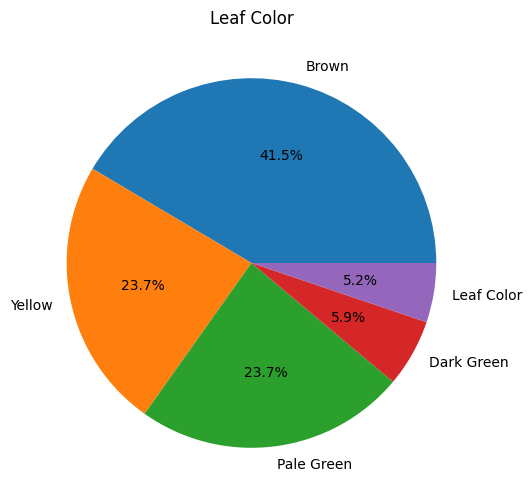

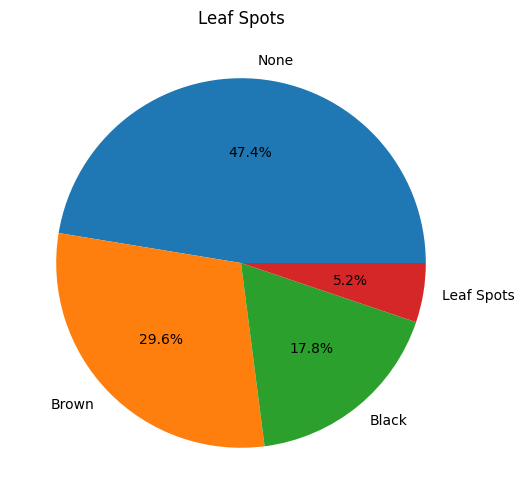

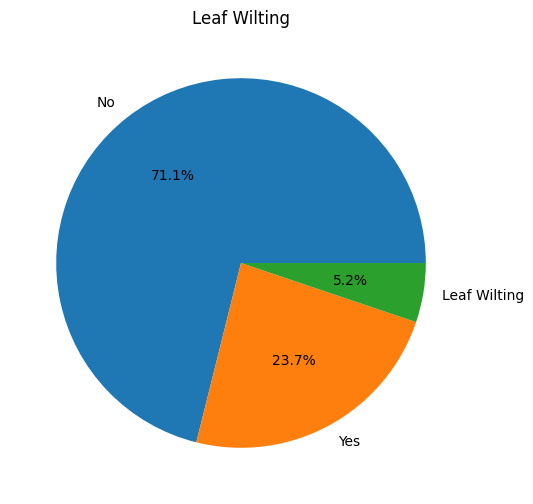

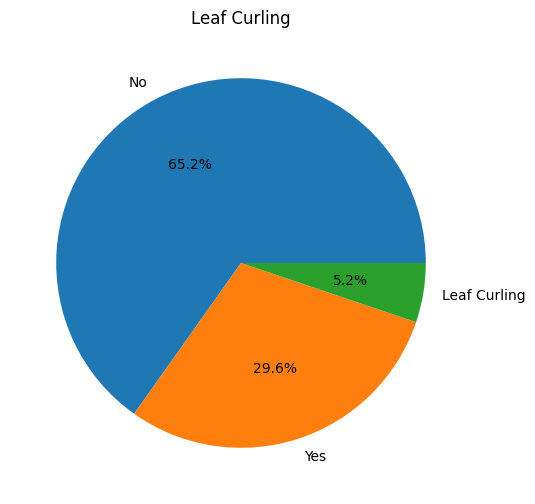

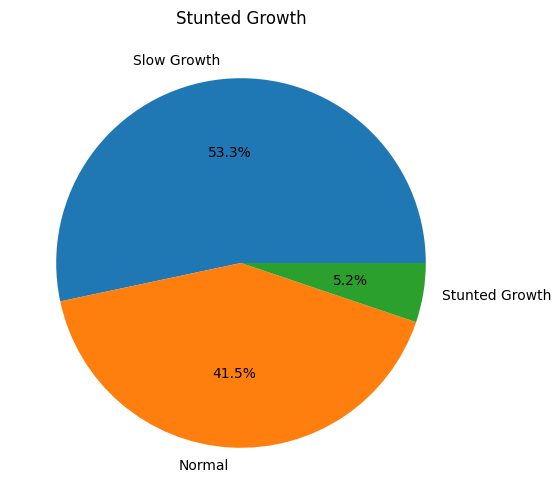

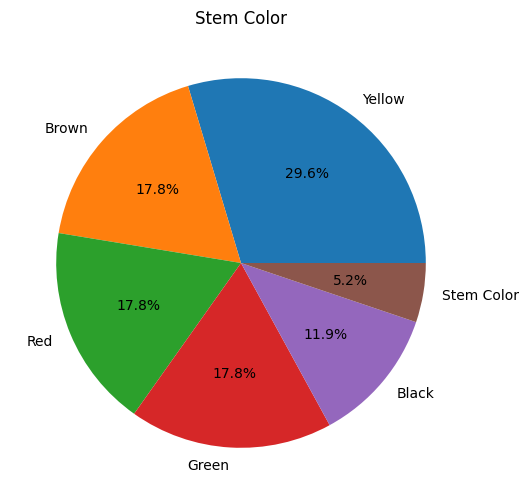

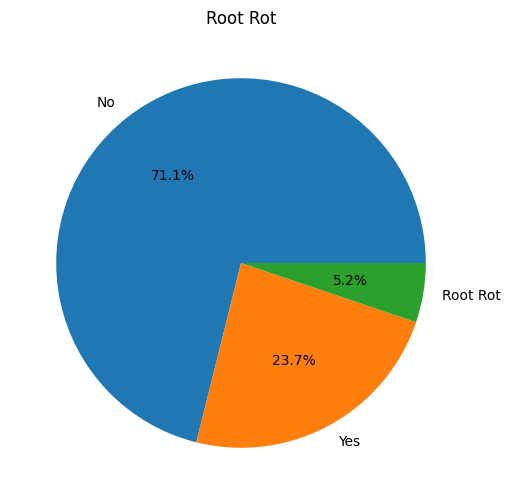

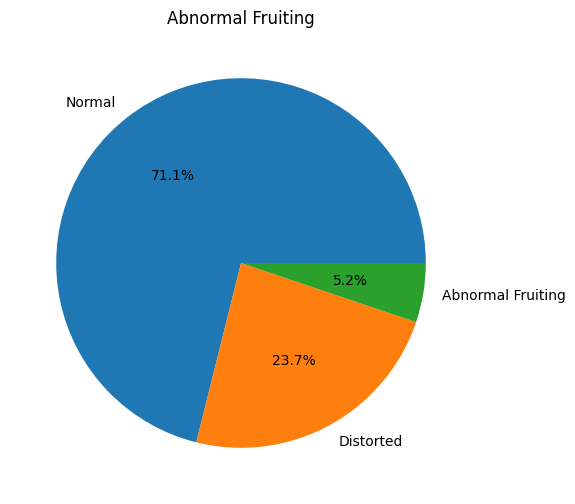

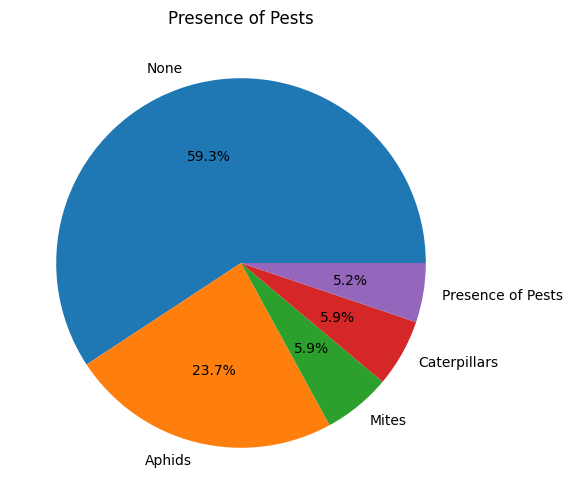

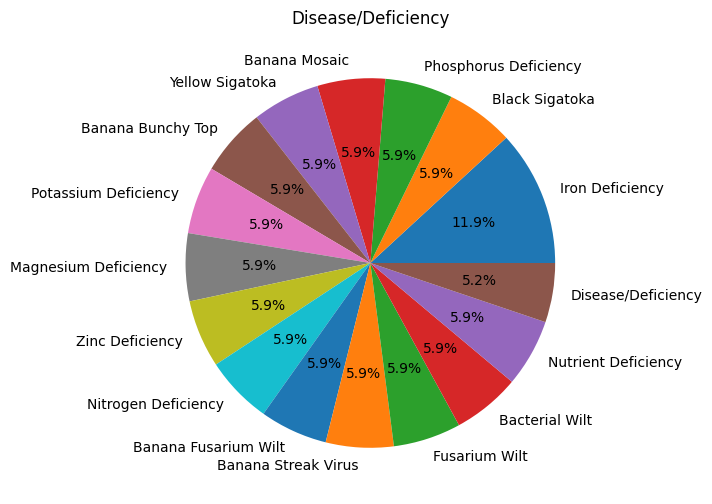

In [141]:
# Select categorical columns
categorical_cols = ['Leaf Color', 'Leaf Spots', 'Leaf Wilting', 'Leaf Curling', 'Stunted Growth', 'Stem Color', 'Root Rot', 'Abnormal Fruiting', 'Presence of Pests', 'Disease/Deficiency']

# Plot pie charts for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(col)
    plt.ylabel('')
    plt.show()

In [142]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import pickle

# Select columns for encoding
ohe_cols = ['Leaf Color', 'Leaf Spots', 'Leaf Wilting', 'Leaf Curling', 'Stunted Growth', 'Stem Color', 'Root Rot', 'Abnormal Fruiting', 'Presence of Pests', 'Disease/Deficiency']

# Separate features (X) and target (y)
X = df[ohe_cols[:-1]]
y = df[ohe_cols[-1]]

# Initialize the one-hot encoder for features
ohe_X = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
ohe_X_data = ohe_X.fit_transform(X)

# Initialize the ordinal encoder for target
ordinal_y = OrdinalEncoder()
ordinal_y_data = ordinal_y.fit_transform(y.values.reshape(-1, 1))

# Save the encoders as pickle files
with open('./saved_data/disease_questionnaire_x_encoder.pkl', 'wb') as file:
    pickle.dump(ohe_X, file)

with open('./saved_data/disease_questionnaire_y_encoder.pkl', 'wb') as file:
    pickle.dump(ordinal_y, file)

# Display the encoded data
print(ohe_X_data)
print(ordinal_y_data)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]]
[[ 1.]
 [ 7.]
 [11.]
 [ 5.]
 [10.]
 [ 3.]
 [ 9.]
 [ 0.]
 [14.]
 [15.]
 [12.]
 [ 4.]
 [13.]
 [ 2.]
 [ 8.]
 [ 8.]
 [ 6.]
 [ 1.]
 [ 7.]
 [11.]
 [ 5.]
 [10.]
 [ 3.]
 [ 9.]
 [ 0.]
 [14.]
 [15.]
 [12.]
 [ 4.]
 [13.]
 [ 2.]
 [ 8.]
 [ 8.]
 [ 6.]
 [ 1.]
 [ 7.]
 [11.]
 [ 5.]
 [10.]
 [ 3.]
 [ 9.]
 [ 0.]
 [14.]
 [15.]
 [12.]
 [ 4.]
 [13.]
 [ 2.]
 [ 8.]
 [ 8.]
 [ 6.]
 [ 1.]
 [ 7.]
 [11.]
 [ 5.]
 [10.]
 [ 3.]
 [ 9.]
 [ 0.]
 [14.]
 [15.]
 [12.]
 [ 4.]
 [13.]
 [ 2.]
 [ 8.]
 [ 8.]
 [ 6.]
 [ 1.]
 [ 7.]
 [11.]
 [ 5.]
 [10.]
 [ 3.]
 [ 9.]
 [ 0.]
 [14.]
 [15.]
 [12.]
 [ 4.]
 [13.]
 [ 2.]
 [ 8.]
 [ 8.]
 [ 6.]
 [ 1.]
 [ 7.]
 [11.]
 [ 5.]
 [10.]
 [ 3.]
 [ 9.]
 [ 0.]
 [14.]
 [15.]
 [12.]
 [ 4.]
 [13.]
 [ 2.]
 [ 8.]
 [ 8.]
 [ 6.]
 [ 1.]
 [ 7.]
 [11.]
 [ 5.]
 [10.]
 [ 3.]
 [ 9.]
 [ 0.]
 [14.]
 [15.]
 [12.]
 [ 4.]
 [13.]
 [ 2.]
 [ 8.]
 [ 8.]
 [ 6.]
 [ 1.]
 [ 7

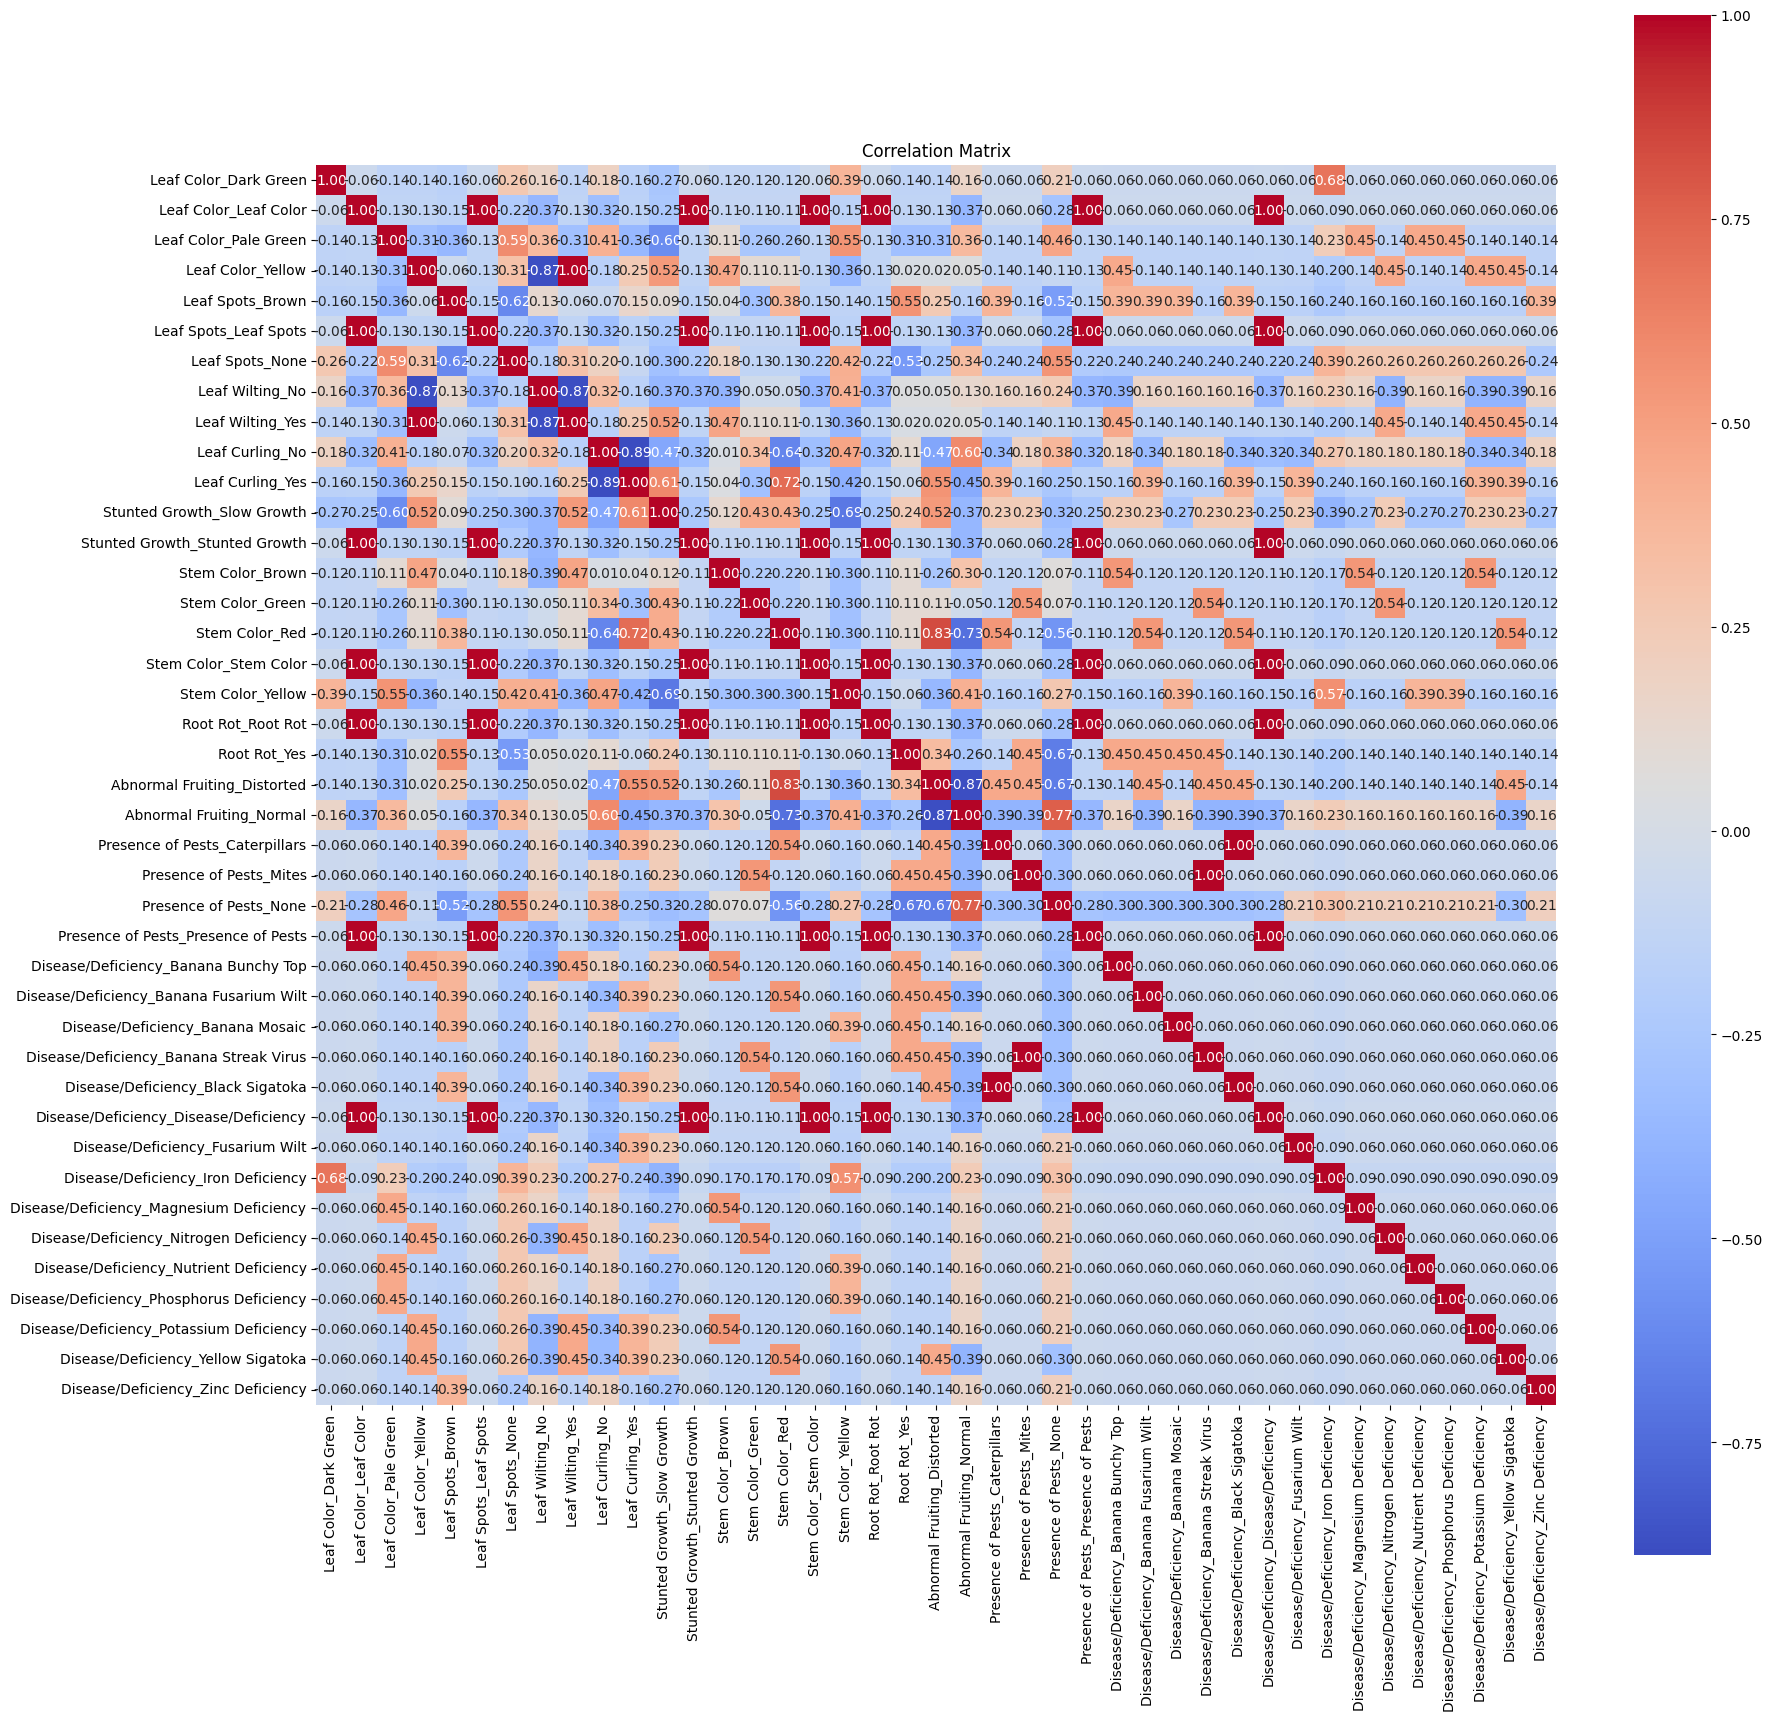

In [143]:
# Select columns for one-hot encoding
ohe_cols = ['Leaf Color', 'Leaf Spots', 'Leaf Wilting', 'Leaf Curling', 'Stunted Growth', 'Stem Color', 'Root Rot', 'Abnormal Fruiting', 'Presence of Pests', 'Disease/Deficiency']

# Initialize the one-hot encoder
ohe = OneHotEncoder(sparse=False, drop='first')

# Perform one-hot encoding
ohe_data = ohe.fit_transform(df[ohe_cols])

# Create a DataFrame using the encoded data
encoded_df = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(ohe_cols))

# Compute the correlation matrix
correlation_matrix = encoded_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

### Model Training

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ohe_X_data, ordinal_y_data, test_size=0.2, random_state=42)

# Initialize and train the models
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis()
]

metrics = ['accuracy', 'precision', 'recall', 'f1']

# Initialize a dictionary to store the evaluation results
evaluations = {}

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model using multiple metrics
    evaluation = {
        'Model': type(model).__name__,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=1),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=1),
        'F1-score': f1_score(y_test, y_pred, average='weighted', zero_division=1)
    }

    evaluations[model.__class__.__name__] = evaluation

# Sort the evaluations based on the F1-score in descending order
sorted_evaluations = sorted(evaluations.values(), key=lambda x: x['F1-score'], reverse=True)

# Get the top 3 models
top_models = sorted_evaluations[:3]

# Print the evaluation results for the top 3 models
for evaluation in top_models:
    print(evaluation['Model'])
    print(evaluation)
    print()


C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\skl

KNeighborsClassifier
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.8518518518518519, 'Precision': 0.9703703703703703, 'Recall': 0.8518518518518519, 'F1-score': 0.8395061728395061}

GaussianNB
{'Model': 'GaussianNB', 'Accuracy': 0.8518518518518519, 'Precision': 0.9703703703703703, 'Recall': 0.8518518518518519, 'F1-score': 0.8395061728395061}

DecisionTreeClassifier
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.8518518518518519, 'Precision': 0.9506172839506172, 'Recall': 0.8518518518518519, 'F1-score': 0.8148148148148148}



#### Evaluation

In [145]:
best_model = None
best_evaluation = None

for model_name, evaluation in evaluations.items():
    if best_evaluation is None or evaluation['Accuracy'] > best_evaluation['Accuracy']:
        best_model = model_name
        best_evaluation = evaluation

print(f"Best Model: {best_model}")
print(f"Evaluation Metrics: {best_evaluation}")

Best Model: DecisionTreeClassifier
Evaluation Metrics: {'Model': 'DecisionTreeClassifier', 'Accuracy': 0.8518518518518519, 'Precision': 0.9506172839506172, 'Recall': 0.8518518518518519, 'F1-score': 0.8148148148148148}


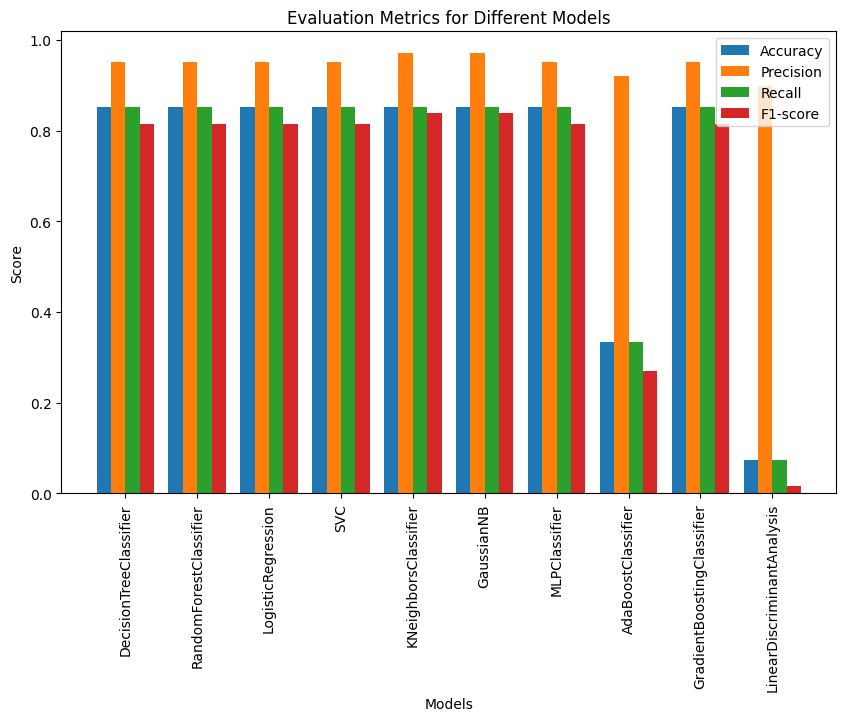

In [146]:
# Initialize lists to store metrics for each model
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate over the evaluations and store the metrics
for evaluation in evaluations.values():
    accuracy_scores.append(evaluation['Accuracy'])
    precision_scores.append(evaluation['Precision'])
    recall_scores.append(evaluation['Recall'])
    f1_scores.append(evaluation['F1-score'])

# Create a list of model names for the x-axis
model_names = list(evaluations.keys())

# Set the width of each bar
bar_width = 0.2

# Set the positions of the bars on the x-axis
positions = np.arange(len(model_names))

# Plot the evaluation metrics for each model
plt.figure(figsize=(10, 6))
plt.bar(positions - 1.5 * bar_width, accuracy_scores, width=bar_width, label='Accuracy')
plt.bar(positions - 0.5 * bar_width, precision_scores, width=bar_width, label='Precision')
plt.bar(positions + 0.5 * bar_width, recall_scores, width=bar_width, label='Recall')
plt.bar(positions + 1.5 * bar_width, f1_scores, width=bar_width, label='F1-score')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Evaluation Metrics for Different Models')
plt.legend()
plt.xticks(positions, model_names, rotation=90)
plt.show()

- Random Forest algorithm performs well

### Model Selection

In [147]:
rf_model = RandomForestClassifier()
rf_model.fit(ohe_X_data, ordinal_y_data)

# save model
with open('./saved_models/disease_questionnaire_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### Testing

In [162]:
import pandas as pd
import numpy as np
import pickle

# Load the trained model
with open('./saved_models/disease_questionnaire_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Load the encoders
with open('./saved_data/disease_questionnaire_x_encoder.pkl', 'rb') as file:
    ohe_X = pickle.load(file)

with open('./saved_data/disease_questionnaire_y_encoder.pkl', 'rb') as file:
    ordinal_y = pickle.load(file)

def predict_disease(symptoms):
    """
    predicts the disease based on the given symptoms.

    args:
        symptoms (dict): dictionary containing the symptoms as keys and their corresponding values.

    returns:
        tuple: a tuple containing the predicted disease label and a dictionary of probabilities for the top three predictions.
    """

    # convert user input into a dataframe
    input_data = pd.DataFrame.from_dict([symptoms])

    # perform one-hot encoding
    encoded_data = ohe_X.transform(input_data)

    # make predictions
    pred_proba = model.predict_proba(encoded_data)
    pred = model.predict(encoded_data)

    # convert predictions back to disease labels
    pred = ordinal_y.inverse_transform(pred.reshape(-1, 1)).flatten()
    labels = ordinal_y.inverse_transform(model.classes_.reshape(-1, 1)).flatten()

    # create predictions and probabilities dictionary for the top three predictions
    top_three_pred_proba = {label: format(probability, '.5f') for label, probability in zip(labels[:3], pred_proba[0, np.argsort(pred_proba[0])[::-1]][:3])}

    return pred[0], top_three_pred_proba

In [156]:
# Example usage
user_input = {
    'Leaf Color': 'Dark Green',
    'Leaf Spots': 'Yes',
    'Leaf Wilting': 'No',
    'Leaf Curling': 'Yes',
    'Stunted Growth': 'Yes',
    'Stem Color': 'Brown',
    'Root Rot': 'No',
    'Abnormal Fruiting': 'No',
    'Presence of Pests': 'Yes'
}

In [163]:
predictions = predict_disease(user_input)
print("Top Three Predictions:")
print(predictions)


[[0.   0.04 0.09 0.02 0.04 0.11 0.14 0.21 0.09 0.13 0.   0.   0.   0.06
  0.04 0.03]]
Top Three Predictions:
('Fusarium Wilt', {'Bacterial Wilt': '0.21000', 'Banana Bunchy Top': '0.14000', 'Banana Fusarium Wilt': '0.13000'})


C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:174: UserWarning: Found unknown categories in columns [1, 4, 7, 8] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
